**Import libraries**

In the first code cell, let's import the necessary libraries:

In [6]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

**Define the TSP problem**

In the next code cell, let's define the TSP problem. We'll create a random set of cities and calculate the distance matrix:

In [7]:
num_cities = 20

# Generate random city coordinates
cities = np.random.rand(num_cities, 2)

# Calculate distance matrix
dist_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        dist_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])


**Define the simulated annealing algorithm**

Next, let's define the simulated annealing algorithm for solving TSP. The algorithm will start with an initial solution (random permutation of cities) and iteratively improve it by swapping cities and probabilistically accepting worse solutions based on the temperature:

In [8]:
def tsp_simulated_annealing(dist_matrix, initial_solution, temperature, cooling_rate, iterations):
    current_solution = initial_solution
    best_solution = current_solution

    for i in range(iterations):
        # Generate a neighboring solution by swapping two cities
        neighbor = current_solution.copy()
        city1, city2 = random.sample(range(num_cities), 2)
        neighbor[city1], neighbor[city2] = neighbor[city2], neighbor[city1]

        # Calculate the total distance of the current and neighboring solutions
        current_distance = sum(dist_matrix[current_solution[j], current_solution[j+1]]
                               for j in range(num_cities - 1)) + dist_matrix[current_solution[-1], current_solution[0]]
        neighbor_distance = sum(dist_matrix[neighbor[j], neighbor[j+1]]
                                for j in range(num_cities - 1)) + dist_matrix[neighbor[-1], neighbor[0]]

        # Accept the neighbor if it's better or with a certain probability if it's worse
        if neighbor_distance < current_distance or random.random() < math.exp((current_distance - neighbor_distance) / temperature):
            current_solution = neighbor

        # Update the best solution if necessary
        if sum(dist_matrix[current_solution[j], current_solution[j+1]]
               for j in range(num_cities - 1)) + dist_matrix[current_solution[-1], current_solution[0]] < \
           sum(dist_matrix[best_solution[j], best_solution[j+1]]
               for j in range(num_cities - 1)) + dist_matrix[best_solution[-1], best_solution[0]]:
            best_solution = current_solution

        # Decrease the temperature
        temperature *= cooling_rate

    return best_solution


In [9]:
def tsp_simulated_annealing_convergence(dist_matrix, initial_solution, temperature, cooling_rate, iterations):
    current_solution = initial_solution
    best_solution = current_solution
    best_distance = float('inf')
    best_distances = []

    for i in range(iterations):
        # Generate a neighboring solution by swapping two cities
        neighbor = current_solution.copy()
        city1, city2 = random.sample(range(num_cities), 2)
        neighbor[city1], neighbor[city2] = neighbor[city2], neighbor[city1]

        # Calculate the total distance of the current and neighboring solutions
        current_distance = sum(dist_matrix[current_solution[j], current_solution[j+1]]
                               for j in range(num_cities - 1)) + dist_matrix[current_solution[-1], current_solution[0]]
        neighbor_distance = sum(dist_matrix[neighbor[j], neighbor[j+1]]
                                for j in range(num_cities - 1)) + dist_matrix[neighbor[-1], neighbor[0]]

        # Accept the neighbor if it's better or with a certain probability if it's worse
        if neighbor_distance < current_distance or random.random() < math.exp((current_distance - neighbor_distance) / temperature):
            current_solution = neighbor

        # Calculate the distance of the current solution
        current_solution_distance = sum(dist_matrix[current_solution[j], current_solution[j+1]]
                                        for j in range(num_cities - 1)) + dist_matrix[current_solution[-1], current_solution[0]]

        # Update the best solution if necessary
        if current_solution_distance < best_distance:
            best_solution = current_solution.copy()
            best_distance = current_solution_distance

        # Record the best distance for this iteration
        best_distances.append(best_distance)

        # Decrease the temperature
        temperature *= cooling_rate

    return best_solution, best_distances

**Run the simulated annealing algorithm**

Now, let's run the simulated annealing algorithm with user-defined parameters. Input the initial temperature and number of iterations. Report this step with various initial parameter and number of iteratio to get the best solution.

In [10]:
initial_solution = list(range(num_cities))
random.shuffle(initial_solution)
cooling_rate = 0.95

temperature = float(input("Enter the initial temperature: "))
iterations = int(input("Enter the number of iterations: "))

# best_solution = tsp_simulated_annealing(dist_matrix, initial_solution, temperature, cooling_rate, iterations)
best_solution, best_distances = tsp_simulated_annealing_convergence(dist_matrix, initial_solution, temperature, cooling_rate, iterations)

print("Best solution:", best_solution)
print("Best distance:", sum(dist_matrix[best_solution[j], best_solution[j+1]]
                            for j in range(num_cities - 1)) + dist_matrix[best_solution[-1], best_solution[0]])


Best solution: [5, 18, 2, 17, 0, 7, 14, 15, 11, 4, 12, 13, 8, 6, 16, 10, 3, 9, 1, 19]
Best distance: 6.312740922923148


**Visualize the solution** (optional)

If you want to visualize the TSP solution, you can add the following code to plot the cities and the best tour found:

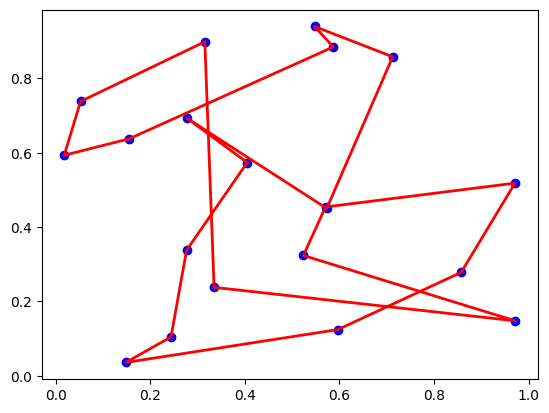

In [11]:
# Plot the cities
plt.scatter(cities[:, 0], cities[:, 1], c='b')

# Plot the best tour found
best_tour_cities = cities[best_solution]
plt.plot(best_tour_cities[:, 0], best_tour_cities[:, 1], c='r', linewidth=2)
plt.plot([best_tour_cities[-1, 0], best_tour_cities[0, 0]],
         [best_tour_cities[-1, 1], best_tour_cities[0, 1]], c='r', linewidth=2)

plt.show()


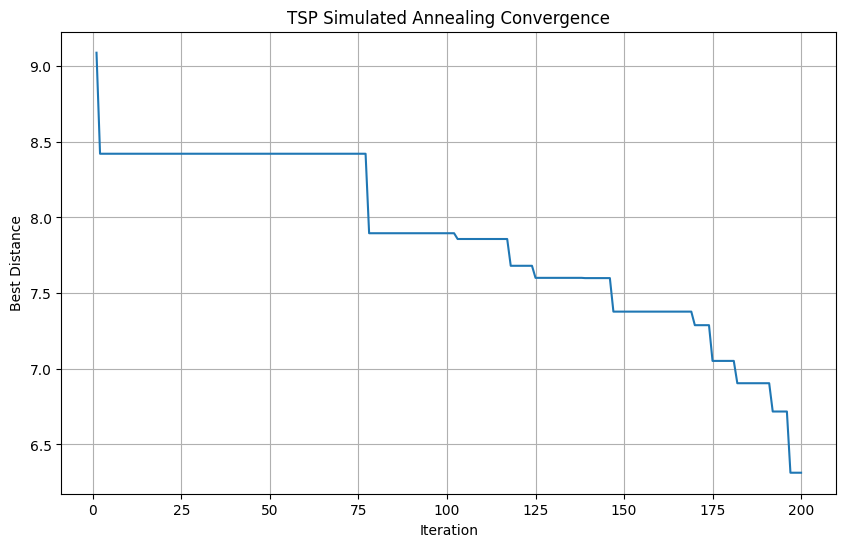

In [14]:
# Plotting the convergence graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), best_distances)
plt.title('TSP Simulated Annealing Convergence')
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.grid(True)
plt.show()